In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error


In [53]:
apartments= pd.read_csv("apartments.csv")

In [54]:
apartments.head()

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


In [55]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
Unnamed: 0    2520 non-null int64
title         2520 non-null object
location      2144 non-null object
bedrooms      2520 non-null int64
bathrooms     2520 non-null int64
price         2520 non-null object
rate          2520 non-null object
dtypes: int64(3), object(4)
memory usage: 137.9+ KB


In [56]:
apartments.describe()

,Unnamed: 0,bedrooms,bathrooms
count,2520.000000,2520.000000,2520.000000
mean,1259.500000,2.551190,2.450794
std,727.605662,0.922868,0.976480
min,0.000000,1.000000,1.000000
25%,629.750000,2.000000,2.000000
50%,1259.500000,3.000000,2.000000
75%,1889.250000,3.000000,3.000000
max,2519.000000,4.000000,5.000000


In [57]:
print(apartments.isnull().any())

Unnamed: 0    False
title         False
location       True
bedrooms      False
bathrooms     False
price         False
rate          False
dtype: bool


In [58]:
print(apartments.isnull().sum())

Unnamed: 0      0
title           0
location      376
bedrooms        0
bathrooms       0
price           0
rate            0
dtype: int64


In [59]:
apartments["location"].head(20)


0              Riverside Dr Nairobi, Riverside, Nairobi
1                                   Kileleshwa, Nairobi
2                      Links Rd Mombasa, Nyali, Mombasa
3                Near Valley Arcade, Lavington, Nairobi
4                                   Kileleshwa, Nairobi
5             Thika Rd Nairobi, Kahawa Wendani, Nairobi
6                                     Kilimani, Nairobi
7                                                   NaN
8                                        Nyali, Mombasa
9                                     Muthaiga, Nairobi
10                                       Nyali, Mombasa
11                                   Westlands, Nairobi
12          Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu
13                                      Shanzu, Mombasa
14               Westlands downtown, Westlands, Nairobi
15                                                  NaN
16              Kileleshwa Nairobi, Kileleshwa, Nairobi
17                                    Kilimani, 

In [60]:
apartments["price"].head(20)

0      200 000
1       70 000
2       38 000
3       80 000
4      110 000
5       57 750
6       65 000
7       78 000
8        5 000
9      300 000
10       5 000
11     165 000
12      55 000
13      55 000
14      75 000
15      75 000
16      55 000
17      75 000
18      45 000
19      65 000
Name: price, dtype: object

In [61]:
apartments['price'].describe()

count        2520
unique         16
top        55 000
freq          382
Name: price, dtype: object

In [62]:
apartments['price'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
2515    <class 'str'>
2516    <class 'str'>
2517    <class 'str'>
2518    <class 'str'>
2519    <class 'str'>
Name: price, Length: 2520, dtype: object

In [63]:
apartments['price']= apartments['price'].str.replace(' ', '')

In [64]:
apartments['price']

0       200000
1        70000
2        38000
3        80000
4       110000
         ...  
2515     75000
2516     45000
2517     65000
2518    300000
2519    100000
Name: price, Length: 2520, dtype: object

In [65]:
apartments['price']= apartments['price'].astype('int')

In [66]:
apartments.describe()

,Unnamed: 0,bedrooms,bathrooms,price
count,2520.000000,2520.000000,2520.000000,2520.000000
mean,1259.500000,2.551190,2.450794,89274.900794
std,727.605662,0.922868,0.976480,63943.997415
min,0.000000,1.000000,1.000000,5000.000000
25%,629.750000,2.000000,2.000000,55000.000000
50%,1259.500000,3.000000,2.000000,70000.000000
75%,1889.250000,3.000000,3.000000,100000.000000
max,2519.000000,4.000000,5.000000,300000.000000


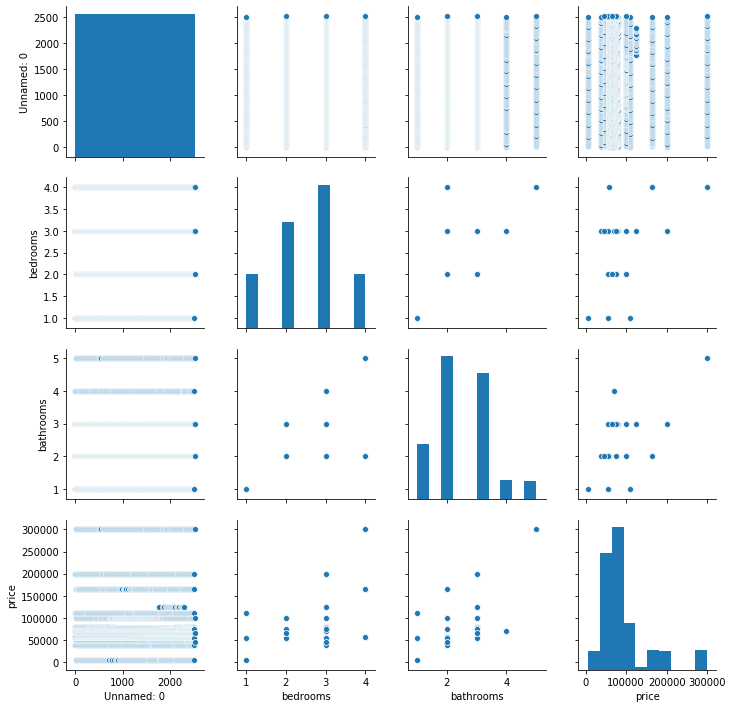

In [67]:
sns.pairplot(apartments)

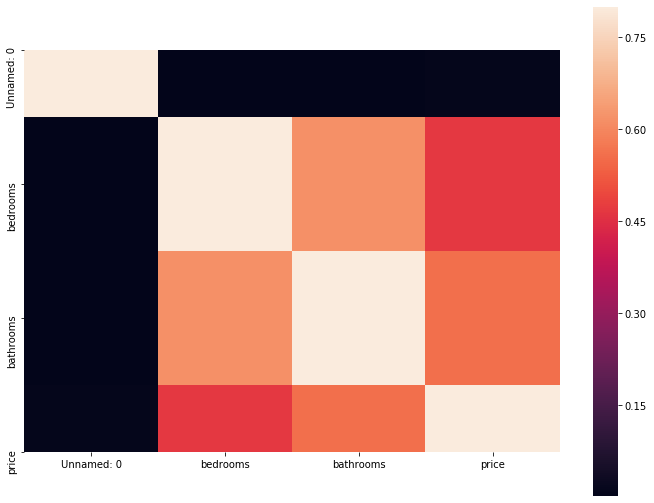

In [17]:
corrmat = apartments.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

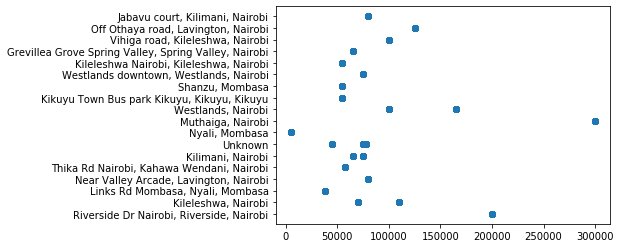

In [71]:
x= apartments['price']
y= apartments['location']
plt.scatter(x,y)

In [69]:
apartments.location = apartments.location.fillna('Unknown')

In [70]:
apartments.location.head(20)

0              Riverside Dr Nairobi, Riverside, Nairobi
1                                   Kileleshwa, Nairobi
2                      Links Rd Mombasa, Nyali, Mombasa
3                Near Valley Arcade, Lavington, Nairobi
4                                   Kileleshwa, Nairobi
5             Thika Rd Nairobi, Kahawa Wendani, Nairobi
6                                     Kilimani, Nairobi
7                                               Unknown
8                                        Nyali, Mombasa
9                                     Muthaiga, Nairobi
10                                       Nyali, Mombasa
11                                   Westlands, Nairobi
12          Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu
13                                      Shanzu, Mombasa
14               Westlands downtown, Westlands, Nairobi
15                                              Unknown
16              Kileleshwa Nairobi, Kileleshwa, Nairobi
17                                    Kilimani, 

In [72]:
apartments.groupby('location').size()

location
Grevillea Grove Spring Valley, Spring Valley, Nairobi    125
Jabavu court, Kilimani, Nairobi                           12
Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu              128
Kileleshwa Nairobi, Kileleshwa, Nairobi                  125
Kileleshwa, Nairobi                                      257
Kilimani, Nairobi                                        251
Links Rd Mombasa, Nyali, Mombasa                         126
Muthaiga, Nairobi                                        126
Near Valley Arcade, Lavington, Nairobi                    35
Nyali, Mombasa                                           125
Off Othaya road, Lavington, Nairobi                       20
Riverside Dr Nairobi, Riverside, Nairobi                 125
Shanzu, Mombasa                                          129
Thika Rd Nairobi, Kahawa Wendani, Nairobi                125
Unknown                                                  376
Vihiga road, Kileleshwa, Nairobi                          56
Westlands downt

In [73]:
location_dictionary= { 
    'Grevillea Grove Spring Valley, Spring Valley, Nairobi': 1,
'Jabavu court, Kilimani, Nairobi':2,                           
'Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu':3,             
'Kileleshwa Nairobi, Kileleshwa, Nairobi':4,                  
'Kileleshwa, Nairobi':5,                                      
'Kilimani, Nairobi':6,                                        
'Links Rd Mombasa, Nyali, Mombasa':7,                       
'Muthaiga, Nairobi':8,                                        
'Near Valley Arcade, Lavington, Nairobi':9,                    
'Nyali, Mombasa':10,                                          
'Off Othaya road, Lavington, Nairobi':11,                       
'Riverside Dr Nairobi, Riverside, Nairobi':12,                 
'Shanzu, Mombasa':13,                                         
'Thika Rd Nairobi, Kahawa Wendani, Nairobi':14,               
'Unknown':15,                                                  
'Vihiga road, Kileleshwa, Nairobi':16,                          
'Westlands downtown, Westlands, Nairobi':17,                   
'Westlands, Nairobi':18                      
}

apartments=apartments.replace({'location':location_dictionary})

In [74]:
apartments.location.head(20)

0     12
1      5
2      7
3      9
4      5
5     14
6      6
7     15
8     10
9      8
10    10
11    18
12     3
13    13
14    17
15    15
16     4
17     6
18    15
19     1
Name: location, dtype: int64

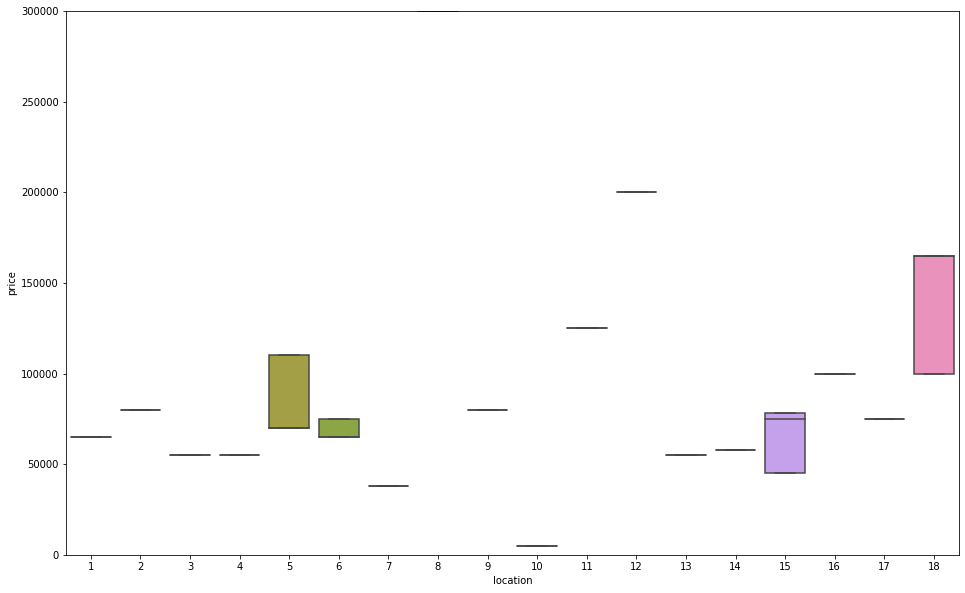

In [75]:
var = 'location'
data = pd.concat([apartments['price'], apartments[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=300000);

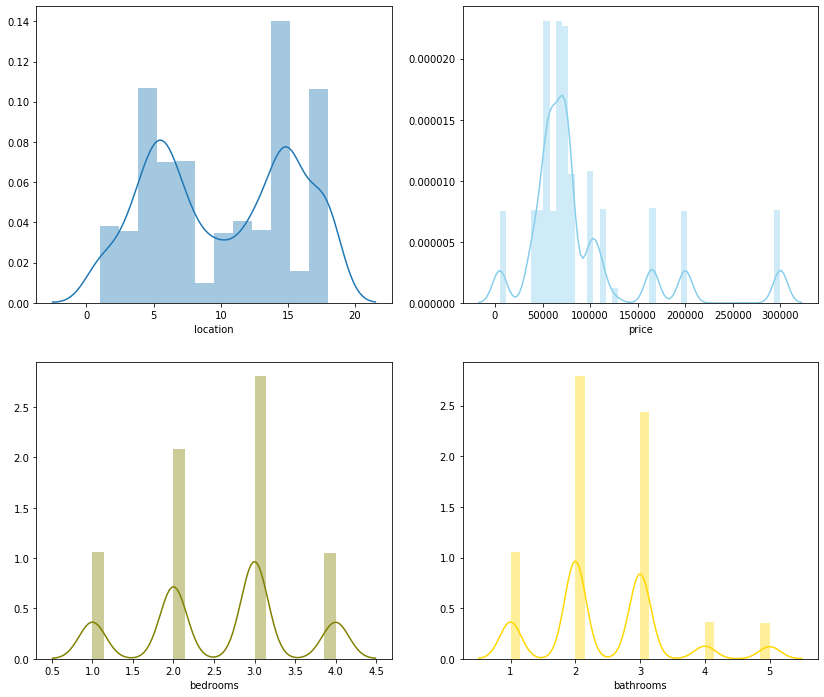

In [76]:
fig, axs = plt.subplots(2,2, figsize=(14, 12))
#plt.figure(figsize = (14, 6))
# showing distribute of age column with .distplot() of seaborn
sns.distplot(apartments['location'], ax=axs[0,0])
sns.distplot(apartments['price'], color="skyblue", ax=axs[0, 1])
sns.distplot(apartments['bedrooms'], color="olive", ax=axs[1, 0])
sns.distplot(apartments['bathrooms'], color="gold", ax=axs[1, 1])

plt.show()
#plt.title('Age Distribution of passengers',)

In [77]:
apartments.describe()

,Unnamed: 0,location,bedrooms,bathrooms,price
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,1259.500000,10.181349,2.551190,2.450794,89274.900794
std,727.605662,5.314415,0.922868,0.976480,63943.997415
min,0.000000,1.000000,1.000000,1.000000,5000.000000
25%,629.750000,5.000000,2.000000,2.000000,55000.000000
50%,1259.500000,10.000000,3.000000,2.000000,70000.000000
75%,1889.250000,15.000000,3.000000,3.000000,100000.000000
max,2519.000000,18.000000,4.000000,5.000000,300000.000000


In [78]:
def log_transformer(dataframe, column):
    dataframe["log_" + column] = np.log(dataframe[column])
    return dataframe["log_" + column]

In [79]:
log_transformer(apartments, 'bedrooms')

0       1.098612
1       1.098612
2       1.098612
3       1.098612
4       0.000000
          ...   
2515    1.098612
2516    1.098612
2517    0.693147
2518    1.386294
2519    0.693147
Name: log_bedrooms, Length: 2520, dtype: float64

In [80]:
log_transformer(apartments, 'bathrooms')

0       1.098612
1       1.386294
2       0.693147
3       1.098612
4       0.000000
          ...   
2515    1.098612
2516    0.693147
2517    1.098612
2518    1.609438
2519    0.693147
Name: log_bathrooms, Length: 2520, dtype: float64

In [81]:
log_transformer(apartments, 'price')

0       12.206073
1       11.156251
2       10.545341
3       11.289782
4       11.608236
          ...    
2515    11.225243
2516    10.714418
2517    11.082143
2518    12.611538
2519    11.512925
Name: log_price, Length: 2520, dtype: float64

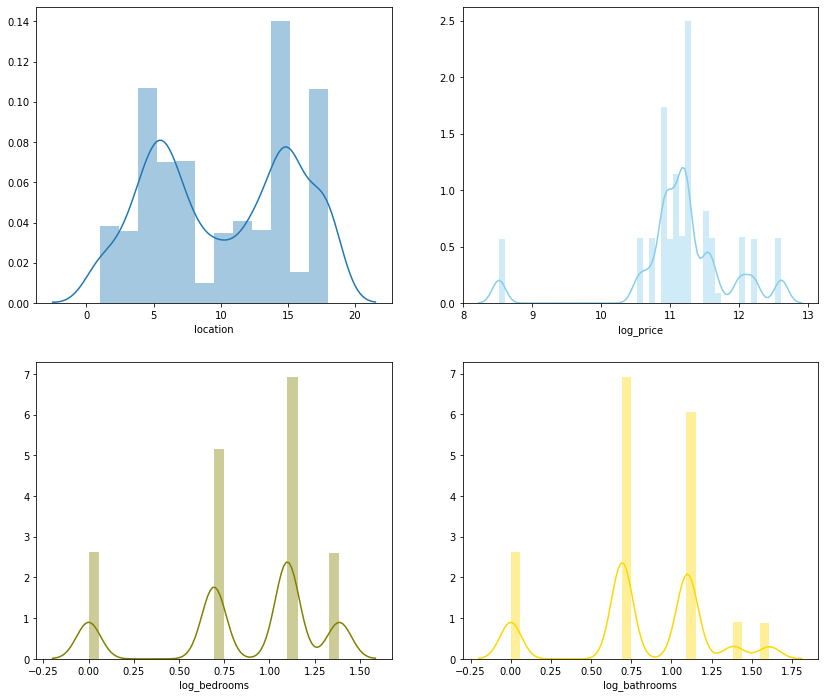

In [82]:
fig, axs = plt.subplots(2,2, figsize=(14, 12))
#plt.figure(figsize = (14, 6))
# showing distribute of age column with .distplot() of seaborn
sns.distplot(apartments['location'], ax=axs[0,0])
sns.distplot(apartments['log_price'], color="skyblue", ax=axs[0, 1])
sns.distplot(apartments['log_bedrooms'], color="olive", ax=axs[1, 0])
sns.distplot(apartments['log_bathrooms'], color="gold", ax=axs[1, 1])

plt.show()
#plt.title('Age Distribution of passengers',)

In [84]:
dataset = apartments.drop(['Unnamed: 0','title', 'rate', 'log_bathrooms', 'log_bedrooms','log_price'], axis = 1)

In [85]:
dataset.describe()

,location,bedrooms,bathrooms,price
count,2520.000000,2520.000000,2520.000000,2520.000000
mean,10.181349,2.551190,2.450794,89274.900794
std,5.314415,0.922868,0.976480,63943.997415
min,1.000000,1.000000,1.000000,5000.000000
25%,5.000000,2.000000,2.000000,55000.000000
50%,10.000000,3.000000,2.000000,70000.000000
75%,15.000000,3.000000,3.000000,100000.000000
max,18.000000,4.000000,5.000000,300000.000000


In [86]:
y= dataset.price
x= dataset.drop('price', axis=1)

train_x, test_x, train_y, test_y = train_test_split(x, y,test_size=0.2, random_state=0)

In [87]:
norm = MinMaxScaler().fit(train_x)

train_x= norm.transform(train_x)
test_x= norm.transform(test_x)


In [96]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()
nb = GaussianNB()
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls',}

gbr = GradientBoostingRegressor(**gbr_params)

lms = [dt,rf,svm,nb,gbr]


In [98]:
rmse= []
for i in range(len(lms)):
    lms[i].fit(train_x,train_y)
    pred = lms[i].predict(test_x)
    rmse.append(mean_squared_error(test_y,pred))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [99]:
mse= pd.DataFrame({'RMSE':rmse},index=['dt','rf','svr','nb','gbr'])
mse

,RMSE
dt,0.000000e+00
rf,0.000000e+00
svr,-1.691196e+07
nb,6.984127e+07
gbr,1.465810e+07


In [100]:
y_pred= dt.predict(test_x)


In [110]:
final_data_1 = test_x, final_data_1['price']: 'y_pred' 

SyntaxError: invalid syntax (<ipython-input-110-5c14eb885db7>, line 1)